Titanic Ship Case Study
Problem Description: On April 15, 1912, during her maiden voyage, the Titanic sank after colliding
with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
 One of the reasons that the shipwreck led to such loss of life was that there were not
enough lifeboats for the passengers and crew.
 Although there was some element of luck involved in surviving the sinking, some groups of

people were more likely to survive than others, such as women, children, and the upper-
class.

The problem associated with the Titanic dataset is to predict whether a passenger survived the
disaster or not. The dataset contains various features such as passenger class, age, gender,
cabin, fare, and whether the passenger had any siblings or spouses on board. These features can
be used to build a predictive model to determine the likelihood of a passenger surviving the
disaster. The dataset offers opportunities for feature engineering, data visualization, and model
selection, making it a valuable resource for developing and testing data analysis and machine
learning skills.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset.

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

Univariate Analysis

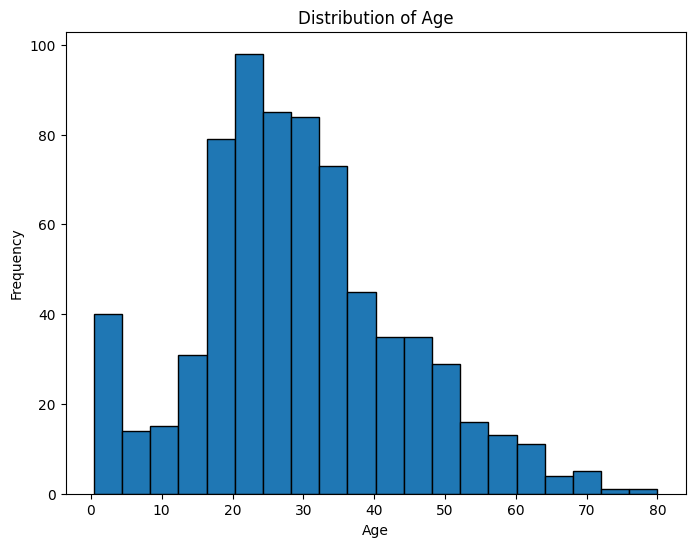

In [4]:
age_data = df['age']


mean_age = age_data.mean()
median_age = age_data.median()
mode_age = age_data.mode().values[0]


std_dev_age = age_data.std()
range_age = age_data.max() - age_data.min()
iqr_age = age_data.quantile(0.75) - age_data.quantile(0.25)


plt.figure(figsize=(8, 6))
plt.hist(age_data.dropna(), bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

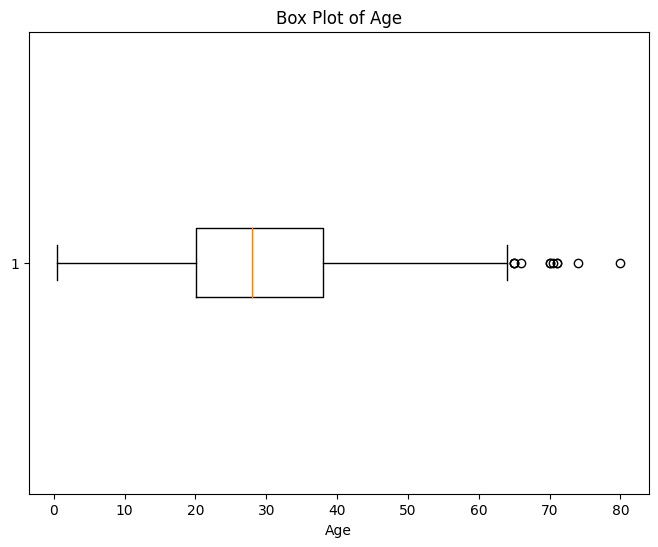

Mean Age: 29.70
Median Age: 28.00
Mode Age: 24.00
Standard Deviation: 14.53
Range: 79.58
IQR: 17.88


In [5]:
plt.figure(figsize=(8, 6))
plt.boxplot(age_data.dropna(), vert=False)
plt.xlabel('Age')
plt.title('Box Plot of Age')
plt.show()

# Print the results
print(f"Mean Age: {mean_age:.2f}")
print(f"Median Age: {median_age:.2f}")
print(f"Mode Age: {mode_age:.2f}")
print(f"Standard Deviation: {std_dev_age:.2f}")
print(f"Range: {range_age:.2f}")
print(f"IQR: {iqr_age:.2f}")

Bi - Variate Analysis

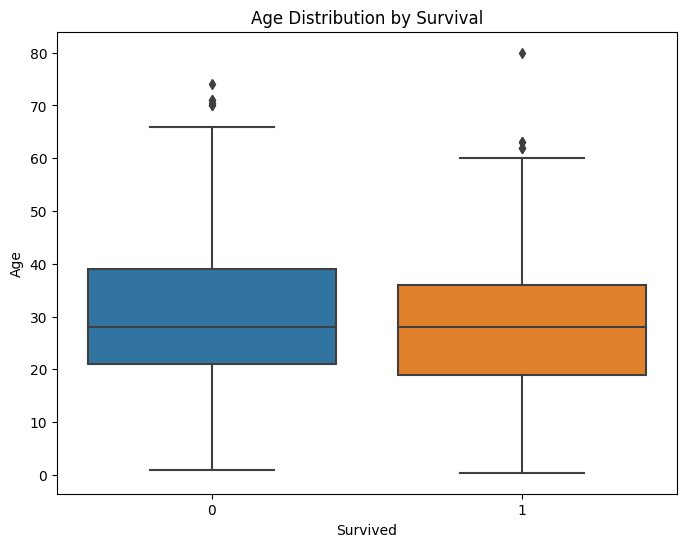

Mean Age by Survival:
survived
0    30.626179
1    28.343690
Name: age, dtype: float64
T-statistic: -2.07
P-value: 0.0391


In [6]:
from scipy.stats import ttest_ind
# Bivariate analysis of 'Survived' and 'Age'
survived_age_data = df[['survived', 'age']].dropna()


mean_age_by_survived = survived_age_data.groupby('survived')['age'].mean()


plt.figure(figsize=(8, 6))
sns.boxplot(x='survived', y='age', data=survived_age_data)
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Age Distribution by Survival')
plt.show()


survived_ages = survived_age_data[survived_age_data['survived'] == 1]['age']
not_survived_ages = survived_age_data[survived_age_data['survived'] == 0]['age']
t_stat, p_value = ttest_ind(survived_ages, not_survived_ages)


print(f"Mean Age by Survival:\n{mean_age_by_survived}")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

Multi - Variate Analysis

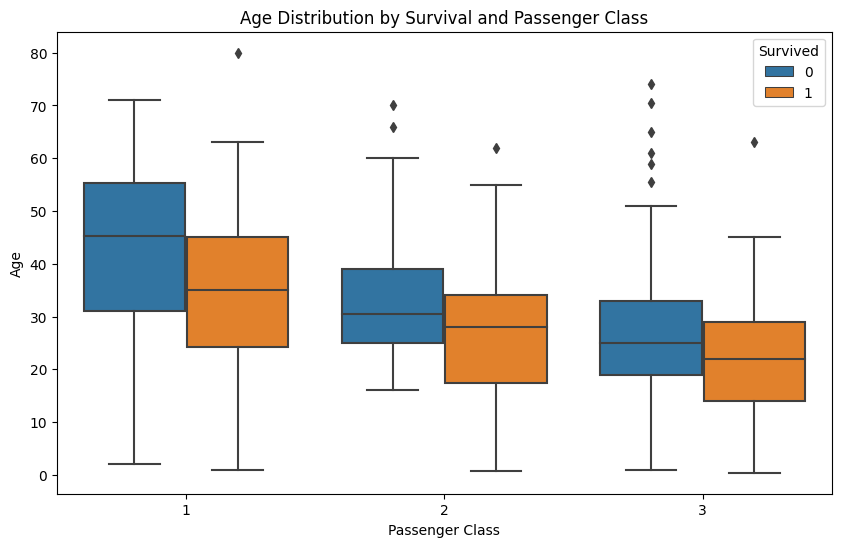

Mean Age by Survival and Passenger Class:
survived  pclass
0         1         43.695312
          2         33.544444
          3         26.555556
1         1         35.368197
          2         25.901566
          3         20.646118
Name: age, dtype: float64
F-statistic: 4.27
P-value: 0.0391


In [7]:
from scipy.stats import f_oneway
# Multivariate analysis of 'Survived', 'Pclass', and 'Age'
multivariate_data = df[['survived', 'pclass', 'age']].dropna()


mean_age_by_survived_pclass = multivariate_data.groupby(['survived', 'pclass'])['age'].mean()


plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='age', hue='survived', data=multivariate_data)
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.title('Age Distribution by Survival and Passenger Class')
plt.legend(title='Survived')
plt.show()


group1 = multivariate_data[multivariate_data['survived'] == 0]['age']
group2 = multivariate_data[multivariate_data['survived'] == 1]['age']
f_stat, p_value = f_oneway(group1, group2)


print(f"Mean Age by Survival and Passenger Class:\n{mean_age_by_survived_pclass}")
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")

Perform descriptive statistics on the dataset.

In [8]:
numerical_vars = ['age', 'fare']
numerical_stats = df[numerical_vars].describe()

# Descriptive statistics for categorical variables
categorical_vars = ['survived', 'pclass', 'sex', 'embarked']
categorical_stats = []

for var in categorical_vars:
    value_counts = df[var].value_counts()
    var_stats = pd.DataFrame({'Variable': [var], 'Value Counts': [value_counts]})
    categorical_stats.append(var_stats)
categorical_stats = pd.concat(categorical_stats, ignore_index=True)

print("Descriptive Statistics for Numerical Variables:")
print(numerical_stats)
print("\nDescriptive Statistics for Categorical Variables:")
print(categorical_stats)

Descriptive Statistics for Numerical Variables:
              age        fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200

Descriptive Statistics for Categorical Variables:
   Variable                                       Value Counts
0  survived     0    549
1    342
Name: survived, dtype: int64
1    pclass  3    491
1    216
2    184
Name: pclass, dtype...
2       sex  male      577
female    314
Name: sex, dtype: ...
3  embarked  S    644
C    168
Q     77
Name: embarked, dty...


Handle the Missing values.

In [9]:
print("Missing Values Before Handling:")
df.isnull().sum()

Missing Values Before Handling:


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [11]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


In [12]:
mode_value = df['embark_town'].mode()[0]
df['embark_town'].fillna(mode_value, inplace=True)

In [13]:
print("Missing Values After Handling:")
df.isnull().sum()

Missing Values After Handling:


survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

Find the outliers and replace the outliers

In [14]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the 'Age' column
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]


median_age = df['age'].median()
df.loc[(df['age'] < lower_bound) | (df['age'] > upper_bound), 'age'] = median_age


print("Number of Outliers:", len(outliers))

Number of Outliers: 66


In [26]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the 'Fare' column
outliers = df[(df['fare'] < lower_bound) | (df['fare'] > upper_bound)]


median_age = df['fare'].median()
df.loc[(df['fare'] < lower_bound) | (df['fare'] > upper_bound), 'fare'] = median_age


print("Number of Outliers:", len(outliers))

Number of Outliers: 116


Check for Categorical columns and perform encoding.

In [16]:
categorical_cols = df.select_dtypes(include=['object']).columns

# Perform one-hot encoding for categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols)
df_encoded['adult_male'] = df_encoded['adult_male'].map({True: 1, False: 0})
df_encoded['alone'] = df_encoded['alone'].map({True: 1, False: 0})
# Print the encoded DataFrame
print(df_encoded.head())

   survived  pclass   age  sibsp  parch     fare  adult_male  alone  \
0         0       3  22.0      1      0   7.2500           1      0   
1         1       1  38.0      1      0  71.2833           0      0   
2         1       3  26.0      0      0   7.9250           0      1   
3         1       1  35.0      1      0  53.1000           0      0   
4         0       3  35.0      0      0   8.0500           1      1   

   sex_female  sex_male  ...  deck_C  deck_D  deck_E  deck_F  deck_G  \
0           0         1  ...       0       0       0       0       0   
1           1         0  ...       1       0       0       0       0   
2           1         0  ...       0       0       0       0       0   
3           1         0  ...       1       0       0       0       0   
4           0         1  ...       0       0       0       0       0   

   embark_town_Cherbourg  embark_town_Queenstown  embark_town_Southampton  \
0                      0                       0               

Split the data into dependent and independent variables.

In [27]:
X = df_encoded.drop('survived' , axis = 1)
y = df_encoded['survived']

Scale the independent variables

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the features using StandardScaler
scaled_features = scaler.fit_transform(X)

# Create a DataFrame with the scaled features
X = pd.DataFrame(scaled_features, columns=X.columns)


In [21]:
X

,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,...,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes
0,0.827377,-0.708584,0.432793,-0.473674,-0.502445,0.811922,-1.231645,-0.737695,0.737695,-0.482043,...,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,-0.482043,-0.307562,0.615838,0.789272,-0.789272
1,-1.566107,0.924948,0.432793,-0.473674,0.786845,-1.231645,-1.231645,1.355574,-1.355574,2.074505,...,3.755222,-0.196116,-0.193009,-0.121681,-0.067153,2.074505,-0.307562,-1.623803,-1.266990,1.266990
2,0.827377,-0.300201,-0.474545,-0.473674,-0.488854,-1.231645,0.811922,1.355574,-1.355574,-0.482043,...,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,-0.482043,-0.307562,0.615838,-1.266990,1.266990
3,-1.566107,0.618661,0.432793,-0.473674,0.420730,-1.231645,-1.231645,1.355574,-1.355574,-0.482043,...,3.755222,-0.196116,-0.193009,-0.121681,-0.067153,-0.482043,-0.307562,0.615838,-1.266990,1.266990
4,0.827377,0.618661,-0.474545,-0.473674,-0.486337,0.811922,0.811922,-0.737695,0.737695,-0.482043,...,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,-0.482043,-0.307562,0.615838,0.789272,-0.789272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.198105,-0.474545,-0.473674,-0.386671,0.811922,0.811922,-0.737695,0.737695,-0.482043,...,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,-0.482043,-0.307562,0.615838,0.789272,-0.789272
887,-1.566107,-1.014871,-0.474545,-0.473674,-0.044381,-1.231645,0.811922,1.355574,-1.355574,-0.482043,...,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,-0.482043,-0.307562,0.615838,-1.266990,1.266990
888,0.827377,0.077463,0.432793,2.008933,-0.176263,-1.231645,-1.231645,1.355574,-1.355574,-0.482043,...,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,-0.482043,-0.307562,0.615838,0.789272,-0.789272
889,-1.566107,-0.300201,-0.474545,-0.473674,-0.044381,0.811922,0.811922,-0.737695,0.737695,2.074505,...,3.755222,-0.196116,-0.193009,-0.121681,-0.067153,2.074505,-0.307562,-1.623803,-1.266990,1.266990


Split the data into training and testing

In [24]:
from sklearn.model_selection import train_test_split
X_train ,  X_test ,y_train , y_test = train_test_split(X,y,train_size = 0.7 , random_state= 41)

In [25]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (623, 30)
X_test shape: (268, 30)
y_train shape: (623,)
y_test shape: (268,)
